In [58]:
Project 4 for Data620
COVID Sentimental Analysis
Gracie Hui Han, Omer Ozone,Don (Geeth) Padmaperum



SyntaxError: invalid syntax (<ipython-input-58-31142122570f>, line 1)

In [ ]:
Project Goal:
Data Used: Twitter

In [1]:
#https://www.trackmyhashtag.com/blog/free-twitter-datasets/
#data were from the above side

In [1]:
#setup 
import pandas as pd
import random
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


#important libraries for preprocessing using NLTK
import nltk 
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk import word_tokenize, FreqDist
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from collections import Counter
nltk.download
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer

# Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\OMERO\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMERO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMERO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


ModuleNotFoundError: No module named 'wordcloud'

In [85]:
#Data Exploration, cleaning and wrangling

In [88]:
import pandas as pd

In [89]:
#c=pd.read_csv(r'C:\\Users\\johnp\\Desktop\\ElonMusk TweetsCOVID.csv',engine='c')
c=pd.read_csv(r'C:\\Users\\user\\Documents\\DATA 620 CDrive HH\\Proj4 GracieHan COVID Tweets\\COVID.csv',engine='c')
#C:\Users\user\Documents\DATA 620 CDrive HH\Proj4 GracieHan COVID Tweets

In [90]:
c.shape

(60160, 22)

In [91]:
c.dtypes

Tweet Id                       object
Tweet URL                      object
Tweet Posted Time (UTC)        object
Tweet Content                  object
Tweet Type                     object
Client                         object
Retweets Received               int64
Likes Received                  int64
Tweet Location                 object
Lat                           float64
Long                          float64
Tweet Language                 object
User Id                        object
Name                           object
Screen Name                    object
User Bio                       object
Verified or Non-Verified       object
Profile URL                    object
Protected or Non-protected     object
User Followers                  int64
User Following                  int64
User Account Creation Date     object
dtype: object

In [92]:
c.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health O...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activi...",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #T...",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly sto...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. P...",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


In [93]:
c2=c.drop(['Tweet Id','Tweet URL','Tweet Type','User Id','Verified or Non-Verified','Lat','Long','Profile URL','Protected or Non-protected'],axis=1)

In [94]:
c2.head(1)

,Tweet Posted Time (UTC),Tweet Content,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,Name,Screen Name,User Bio,User Followers,User Following,User Account Creation Date
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Twitter for iPhone,0,0,NaN,English,Giuseppe Gentile,Giussi92,NaN,3071,100,30 Jun 2013 00:27:50


In [95]:
#created a new column linked to #
c2['hashtag'] = c2['Tweet Content'].apply(lambda x: re.findall(r"#(\w+)", x))

In [96]:
c2.head()

,Tweet Posted Time (UTC),Tweet Content,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,Name,Screen Name,User Bio,User Followers,User Following,User Account Creation Date,hashtag
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Twitter for iPhone,0,0,NaN,English,Giuseppe Gentile,Giussi92,NaN,3071,100,30 Jun 2013 00:27:50,[coronavirus]
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health O...,Twitter Web App,0,0,Los Angeles CA USA,English,London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activi...",4189,84,12 Feb 2010 21:43:17,[coronavirus]
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\...",Twitter Web App,23,64,"Miami, FL",English,Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #T...",534045,10037,09 Dec 2008 01:54:21,"[Coronavirus, TDS]"
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https...",Twitter for iPhone,4,11,NYC and the North Fork,English,Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly sto...,27704,1060,25 Mar 2007 19:14:46,[COVID19]
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,English,Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. P...",94269,1999,06 Dec 2008 08:56:45,[coronavirus]


In [97]:
c2.hashtag.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[coronavirus]                                                                                                                                                                                                    20673
[Coronavirus]                                                                                                                                                                                                     4975
[CoronaVirus]                                                                                                                                                                                                     1753
[Wuhan, coronavirus, China]                                                                                                                                                                                        682
[China, coronavirus]                                                                                                                        

In [98]:
#created a new column linked to #
c2['mentioned'] = c2['Tweet Content'].apply(lambda x: re.findall(r"@(\w+)", x))

In [99]:
c2.head()

,Tweet Posted Time (UTC),Tweet Content,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,Name,Screen Name,User Bio,User Followers,User Following,User Account Creation Date,hashtag,mentioned
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Twitter for iPhone,0,0,NaN,English,Giuseppe Gentile,Giussi92,NaN,3071,100,30 Jun 2013 00:27:50,[coronavirus],[]
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health O...,Twitter Web App,0,0,Los Angeles CA USA,English,London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activi...",4189,84,12 Feb 2010 21:43:17,[coronavirus],[]
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\...",Twitter Web App,23,64,"Miami, FL",English,Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #T...",534045,10037,09 Dec 2008 01:54:21,"[Coronavirus, TDS]",[]
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https...",Twitter for iPhone,4,11,NYC and the North Fork,English,Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly sto...,27704,1060,25 Mar 2007 19:14:46,[COVID19],[]
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,English,Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. P...",94269,1999,06 Dec 2008 08:56:45,[coronavirus],[larry_kudlow]


In [100]:
from ekphrasis.classes.segmenter import Segmenter

In [101]:
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [102]:
#Clean Tweets 
#remove number
c2['Tidy_Tweet'] = c2['Tweet Content'].astype(str).str.replace('\d+', '')
lower_text = c2['Tidy_Tweet'].str.lower()

#remove punctuation
def remove_punctuation(words):
 new_words = []
 for word in words:
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
       new_words.append(new_word)
 return new_words

c2['Tidy_Tweet']=remove_punctuation(c2['Tidy_Tweet'])

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [103]:
#tidy tweets
c2['Tidy_Tweet'] = np.vectorize(remove_pattern)(c2['Tidy_Tweet'], "@[\w]*") 
c2['Tidy_Tweet'] = c2['Tidy_Tweet'].str.replace("[^a-zA-Z#]", " ")

#remove short words
c2['Tidy_Tweet'] =c2['Tidy_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [104]:
c2.head(2)

,Tweet Posted Time (UTC),Tweet Content,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,Name,Screen Name,User Bio,User Followers,User Following,User Account Creation Date,hashtag,mentioned,Tidy_Tweet
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Twitter for iPhone,0,0,NaN,English,Giuseppe Gentile,Giussi92,NaN,3071,100,30 Jun 2013 00:27:50,[coronavirus],[],Also entire Swiss Football League hold Postponing games from professional amateur level coronavi...
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health O...,Twitter Web App,0,0,Los Angeles CA USA,English,London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activi...",4189,84,12 Feb 2010 21:43:17,[coronavirus],[],World Health Official Trumps press conference coronavirus incoherent World Health Organization S...


In [105]:
#Text Normalization
tokenized_tweet = c2['Tidy_Tweet'].apply(lambda x: x.split()) # tokenizing


In [106]:
tokenized_tweet.head()

0    [Also, entire, Swiss, Football, League, hold, Postponing, games, from, professional, amateur, le...
1    [World, Health, Official, Trumps, press, conference, coronavirus, incoherent, World, Health, Org...
2           [mean, Liberals, cheerleading, this, Coronavirus, like, their, high, school, football, team]
3           [Under, repeated, questioning, Pompeo, refuses, COVID, coronavirus, hoax, httpstcoPFESxePpD]
4                                    [coronavirus, comments, from, larry, kudlow, here, httpstcolebUmBK]
Name: Tidy_Tweet, dtype: object

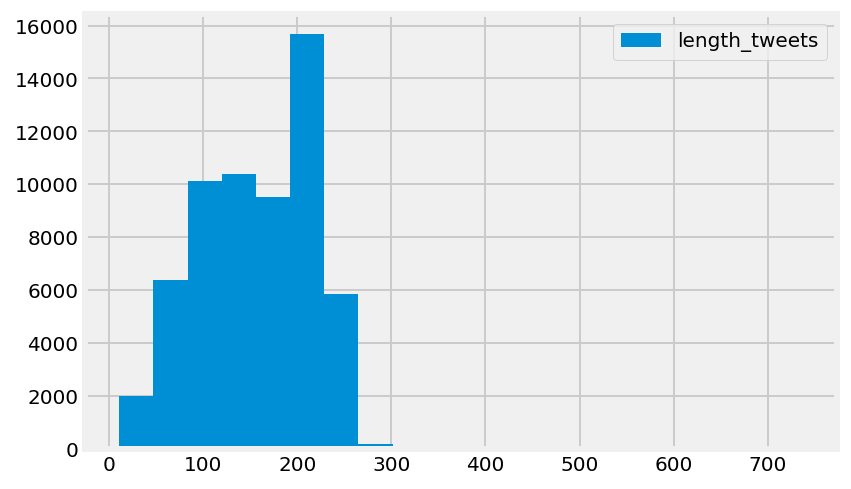

In [107]:
length = c2['Tidy_Tweet'].str.len()

plt.hist(length, bins=20, label="length_tweets")
plt.legend()
plt.show()

In [108]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [109]:
#Now let’s stitch these tokens back together.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
c2['Tidy_Tweet'] = tokenized_tweet

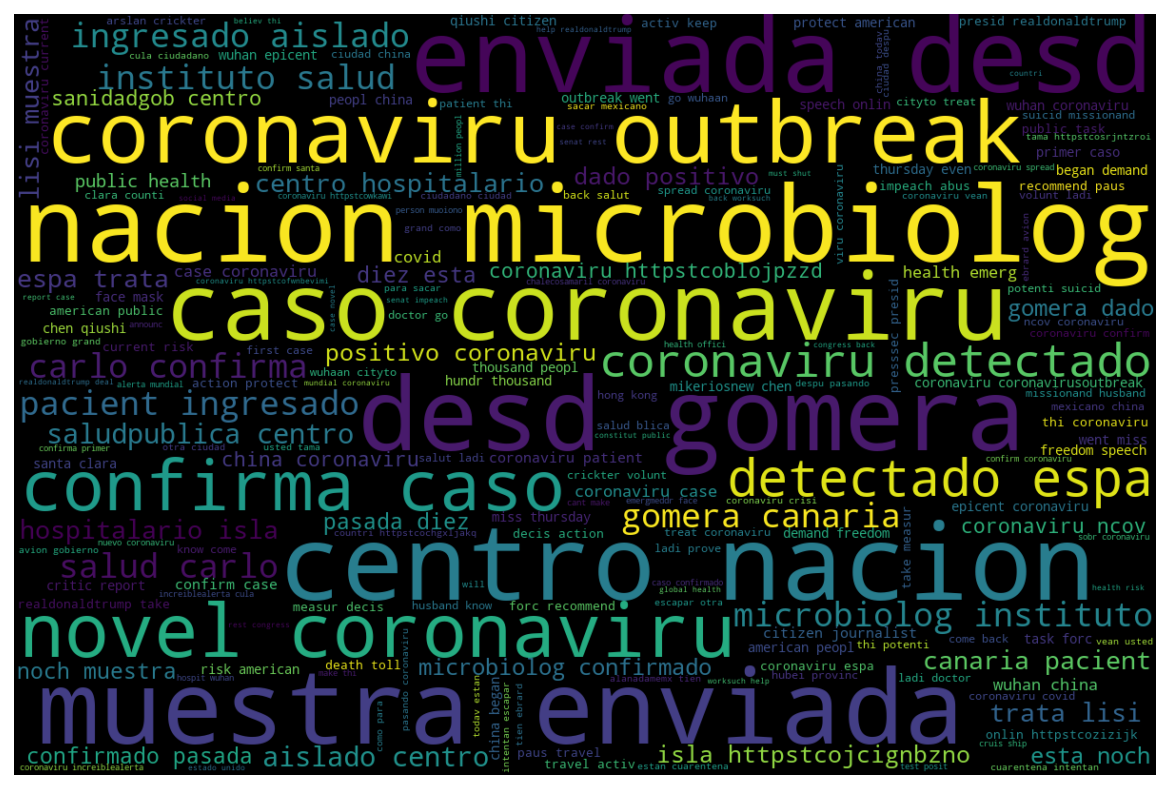

In [110]:
all_words = ' '.join([text for text in tokenized_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1200, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Top 20 most unique words used from the dataset 

        Word  Frequency
  coronaviru      63388
       china      16634
       wuhan       8663
        from       8537
         thi       6643
      centro       6151
        that       5902
        case       5505
       peopl       5294
        with       5242
        viru       5212
        caso       5083
        ncov       4685
        have       4616
      gomera       4406
        desd       4245
      nacion       4133
    outbreak       4095
 microbiolog       4042
     confirm       4006




<AxesSubplot:title={'center':'Top 20 most unique words used from the dataset'}, ylabel='Frequency'>

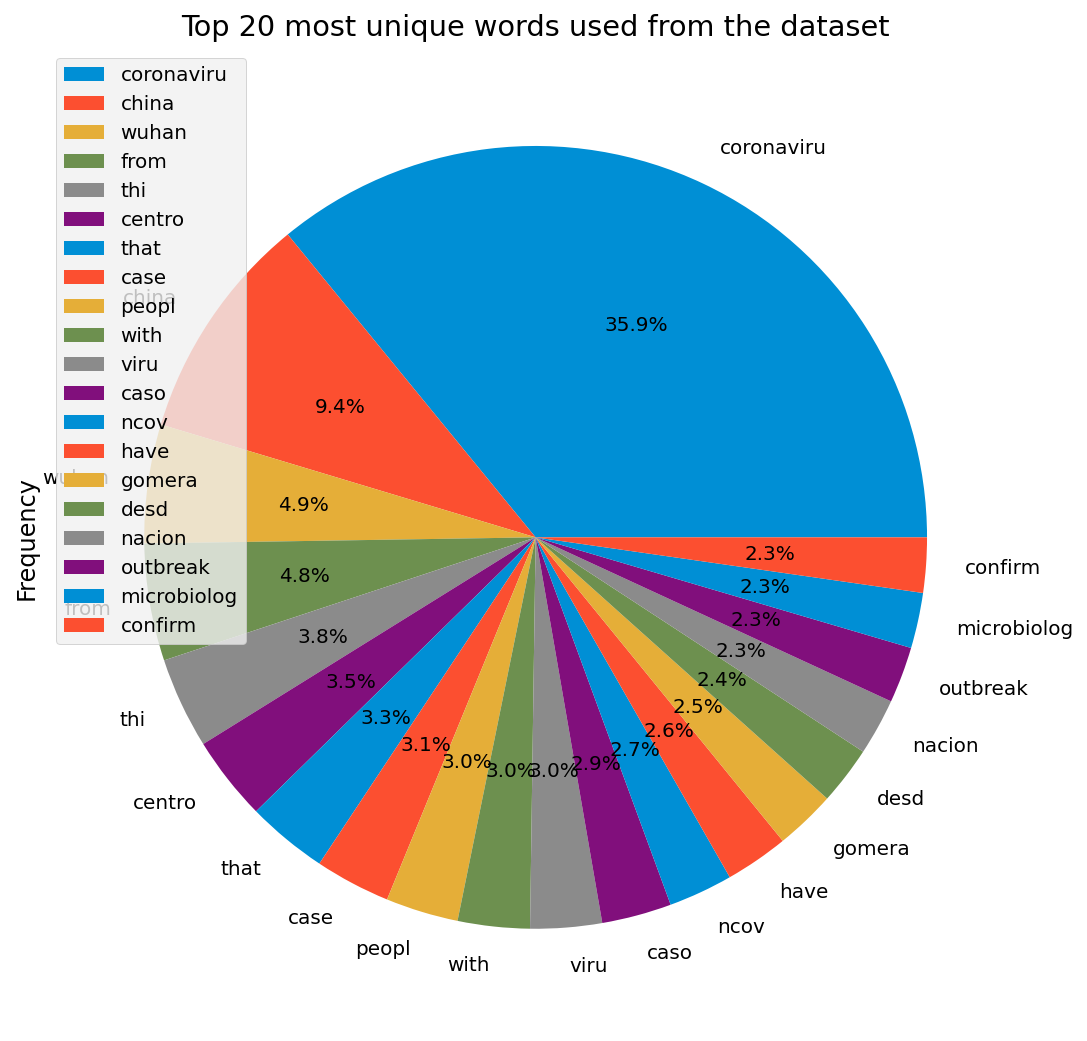

In [111]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

no_top_unique_words = "20" #@param {type:"string"}



result = Counter(" ".join(tokenized_tweet.values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

In [112]:
#The network analysis below looks at how Musk, those he follows and those they follow are 
#connected to one another. We use NetworkX to create our network from our dataframe.

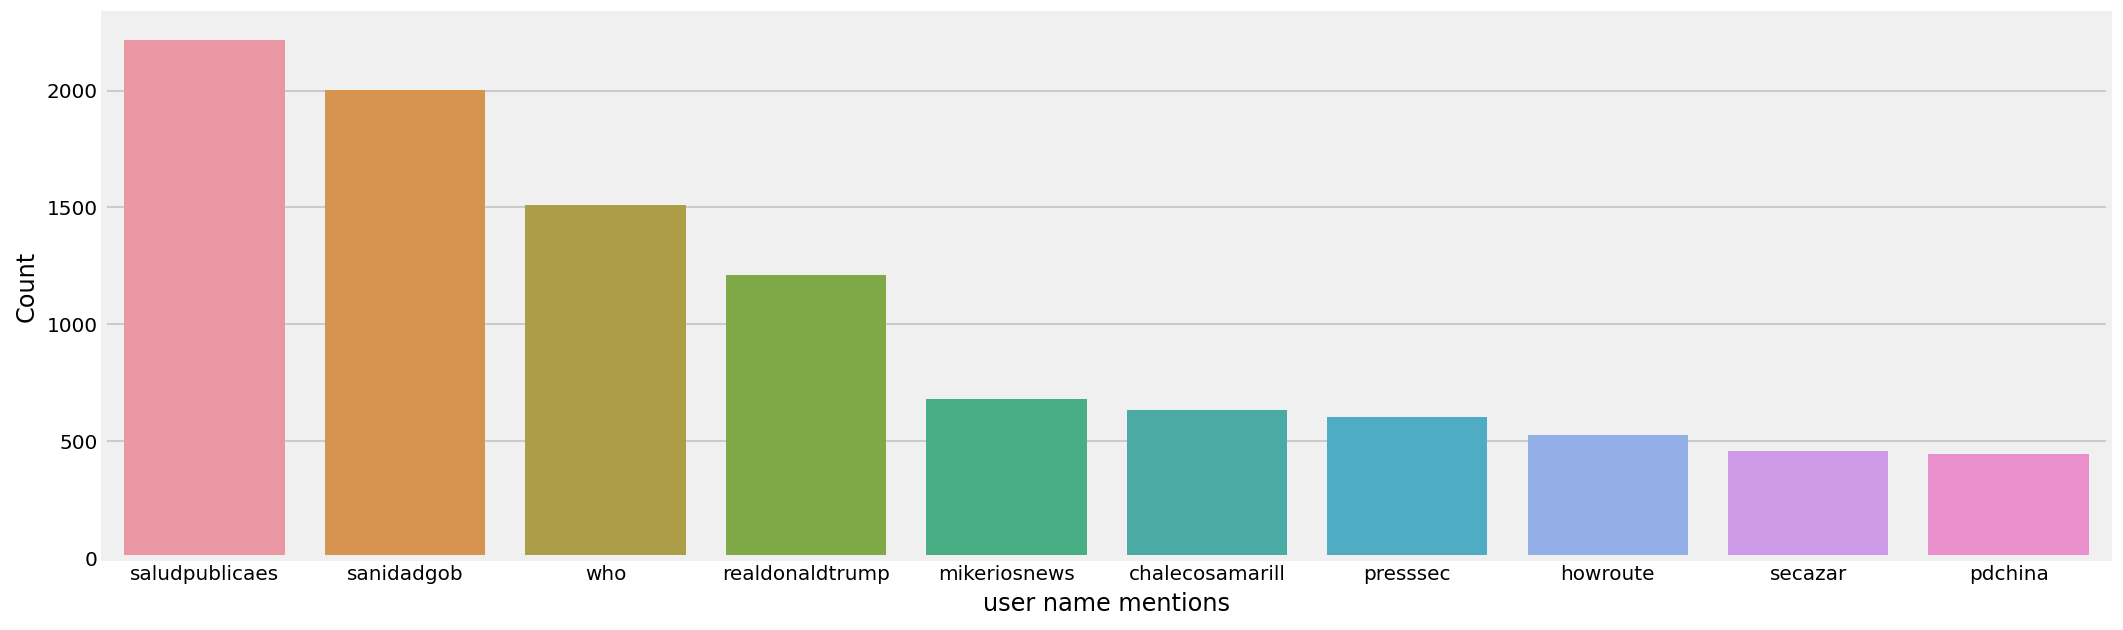

In [113]:
## collecting the @ mentioned user name

def at_extract(x):
    ats = []
    
    for i in x:
        at = re.findall(r"@(\w+)", i)
        ats.append(at)

    return ats

at_regular = at_extract(c['Tweet Content'].str.lower())

 # unnesting list
at_regular = sum(at_regular,[])

a = nltk.FreqDist(at_regular)
d = pd.DataFrame({'ats': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "ats", y = "Count")
ax.set(ylabel = 'Count',xlabel='user name mentions')
plt.show()


# collecting the # linked words 

def ht_extract(x):
    hts = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hts.append(ht)

    return hts

ht_regular = ht_extract(c['Tweet Content'].str.lower())

# unnesting list
ht_regular = sum(ht_regular,[])

a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'hts': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "hts", y = "Count")
ax.set(ylabel = 'Count',xlabel='hastaged words')
plt.show()


In [114]:
import networkx as nx

In [115]:
c2.head(2)

,Tweet Posted Time (UTC),Tweet Content,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,Name,Screen Name,User Bio,User Followers,User Following,User Account Creation Date,hashtag,mentioned,Tidy_Tweet
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and ama...,Twitter for iPhone,0,0,NaN,English,Giuseppe Gentile,Giussi92,NaN,3071,100,30 Jun 2013 00:27:50,[coronavirus],[],also entir swiss footbal leagu hold postpon game from profession amateur level coronaviru httpst...
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health O...,Twitter Web App,0,0,Los Angeles CA USA,English,London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activi...",4189,84,12 Feb 2010 21:43:17,[coronavirus],[],world health offici trump press confer coronaviru incoher world health organ special advis direc...


In [116]:
#Calculating the polarity score for each tweet
#The code will analyze each tweet in the data frame and return a predicted value/score for 
#each sentiment positive/negative/neutral.

In [117]:
COVID_Sentiment_url = c2['Tidy_Tweet'].apply(lambda x: re.sub(r"https\S+", "", x))

In [118]:
COVID_Sentiment_lwr   = COVID_Sentiment_url.apply(lambda x: x.lower())

In [119]:
COVID_Sentiment_punc = COVID_Sentiment_lwr.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [120]:
stop_words = set(stopwords.words('english'))


In [121]:
stop_words.update(['#coronavirus','#china', '#wuhan','#covid19','#2019nco','thi','#nco2019',
                   '#virus','#wuhanvirus','#wuhancoronavirus','microbiolog','have','with',
                   '#coronavirusoutbreak', '#coronavirusPandemic', '#covid','#stayathome', '#washyourhands', '#workfromhome'])

In [122]:
COVID_Sentiment_wrds = COVID_Sentiment_punc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
COVID_Sentiment_wrds.head()

0                   also entir swiss footbal leagu hold postpon game profession amateur level coronaviru
1    world health offici trump press confer coronaviru incoher world health organ special advis direc...
2                                          mean liber cheerlead coronaviru like high school footbal team
3                                                     repeat question pompeo refus covid coronaviru hoax
4                                                                        coronaviru comment larri kudlow
Name: Tidy_Tweet, dtype: object

In [123]:
COVID_Sentiment_concat = [word for line in COVID_Sentiment_wrds for word in line.split()]
COVID_Sentiment_concat[:5]

['also', 'entir', 'swiss', 'footbal', 'leagu']

In [124]:
COVID_Text = pd.DataFrame(c2['Tidy_Tweet'])
COVID_Text['Text Processed'] = pd.DataFrame(COVID_Sentiment_wrds)

In [125]:
counts = Counter(COVID_Sentiment_concat).most_common(20)
COVID_Sentiment_count = pd.DataFrame(counts)
COVID_Sentiment_count.columns = ['Term', 'Frequency']

COVID_Sentiment_count

,Term,Frequency
0,coronaviru,63388
1,china,16636
2,wuhan,8663
3,centro,6151
4,case,5505
5,peopl,5294
6,viru,5212
7,caso,5083
8,ncov,4685
9,gomera,4406


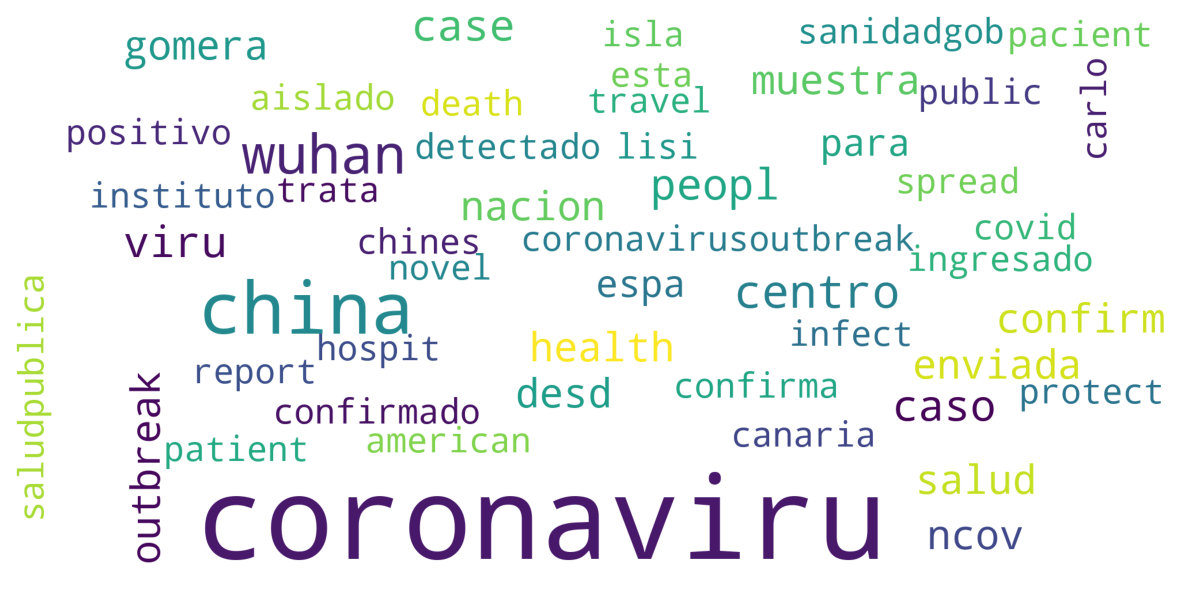

In [126]:
wordcloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(COVID_Sentiment_concat))


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [127]:
sid = SentimentIntensityAnalyzer()
COVID_Sentiment_polarity = COVID_Sentiment_wrds.apply(lambda x: sid.polarity_scores(x))
COVID_Sentiment_scores = pd.DataFrame(list(COVID_Sentiment_polarity))
COVID_Sentiment_scores.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.881,0.119,0.4019
2,0.000,0.574,0.426,0.6369
3,0.259,0.741,0.000,-0.2732
4,0.000,1.000,0.000,0.0000


In [128]:
COVID_Sentiment_scores['sentiment'] = COVID_Sentiment_scores['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
COVID_Sentiment_scores.head()

,neg,neu,pos,compound,sentiment
0,0.000,1.000,0.000,0.0000,neutral
1,0.000,0.881,0.119,0.4019,positive
2,0.000,0.574,0.426,0.6369,positive
3,0.259,0.741,0.000,-0.2732,negative
4,0.000,1.000,0.000,0.0000,neutral


In [129]:
COVID_Sentiment_plt = pd.DataFrame.from_dict(Counter(COVID_Sentiment_scores['sentiment']), orient = 'index').reset_index()
COVID_Sentiment_plt.columns = ['sentiment', 'count']

COVID_Sentiment_plt['%'] = (COVID_Sentiment_plt['count']/COVID_Sentiment_plt['count'].sum()).round(2)
COVID_Sentiment_plt.sort_values('%', ascending=False)

,sentiment,count,%
0,neutral,33710,0.56
1,positive,14695,0.24
2,negative,11755,0.20


In [130]:
COVID_Text['Sentiment'] = COVID_Sentiment_scores['sentiment']
COVID_Text.head(5)

,Tidy_Tweet,Text Processed,Sentiment
0,also entir swiss footbal leagu hold postpon game from profession amateur level coronaviru httpst...,also entir swiss footbal leagu hold postpon game profession amateur level coronaviru,neutral
1,world health offici trump press confer coronaviru incoher world health organ special advis direc...,world health offici trump press confer coronaviru incoher world health organ special advis direc...,positive
2,mean liber cheerlead thi coronaviru like their high school footbal team,mean liber cheerlead coronaviru like high school footbal team,positive
3,under repeat question pompeo refus covid coronaviru hoax httpstcopfesxeppd,repeat question pompeo refus covid coronaviru hoax,negative
4,coronaviru comment from larri kudlow here httpstcolebumbk,coronaviru comment larri kudlow,neutral


In [131]:
Positive_Tweets.head()  ## buggy now

,Tidy_Tweet,Text Processed,Sentiment
1,world health offici trump press confer coronaviru incoher world health organ special advis direc...,world health offici trump press confer coronaviru incoher world health organ special advis direc...,positive
2,mean liber cheerlead thi coronaviru like their high school footbal team,mean liber cheerlead coronaviru like high school footbal team,positive
6,diseas emerg everywher coronavirus exist global basi import that dont ascrib blame geograph orig...,diseas emerg everywher coronavirus exist global basi import dont ascrib blame geograph originth ...,positive
7,when viru felt that should stay help selinawangtv connect with wang she part special forc under ...,viru felt stay help selinawangtv connect wang part special forc china uber didiglob help strand ...,positive
10,harvard epidemiolog professor marc lipsitch think like outcom that will ultim contain coronaviru...,harvard epidemiolog professor marc lipsitch think like outcom ultim contain coronaviru atlant,positive


In [132]:
COVID_Text.shape

(60160, 3)

In [133]:
COVID_Text.head()

,Tidy_Tweet,Text Processed,Sentiment
0,also entir swiss footbal leagu hold postpon game from profession amateur level coronaviru httpst...,also entir swiss footbal leagu hold postpon game profession amateur level coronaviru,neutral
1,world health offici trump press confer coronaviru incoher world health organ special advis direc...,world health offici trump press confer coronaviru incoher world health organ special advis direc...,positive
2,mean liber cheerlead thi coronaviru like their high school footbal team,mean liber cheerlead coronaviru like high school footbal team,positive
3,under repeat question pompeo refus covid coronaviru hoax httpstcopfesxeppd,repeat question pompeo refus covid coronaviru hoax,negative
4,coronaviru comment from larri kudlow here httpstcolebumbk,coronaviru comment larri kudlow,neutral


In [134]:
Positive_Tweets = COVID_Text[COVID_Text.Sentiment == 'positive']
print(Positive_Tweets.shape)
Positive_Tweets.loc[:,['Text Processed','Sentiment']].head(5)

(14695, 3)


,Text Processed,Sentiment
1,world health offici trump press confer coronaviru incoher world health organ special advis direc...,positive
2,mean liber cheerlead coronaviru like high school footbal team,positive
6,diseas emerg everywher coronavirus exist global basi import dont ascrib blame geograph originth ...,positive
7,viru felt stay help selinawangtv connect wang part special forc china uber didiglob help strand ...,positive
10,harvard epidemiolog professor marc lipsitch think like outcom ultim contain coronaviru atlant,positive


In [135]:
Negative_Tweets = COVID_Text[COVID_Text.Sentiment == 'negative']
print(Negative_Tweets.shape)
Negative_Tweets.loc[:,['Text Processed','Sentiment']].head(5)

(11755, 3)


,Text Processed,Sentiment
3,repeat question pompeo refus covid coronaviru hoax,negative
5,go school shut probabl white hous chief staff mick mulvaney warn coronaviru could disrupt school...,negative
8,say increas assess risk spread risk impact coronaviru veri high global level covid,negative
16,dailydos news arriv memeghnad bring latest updat delhi smoulder coronaviru scare minimoon listen,negative
18,world health organis epidemiologist monitor develop continu increas assess risk spread risk impa...,negative


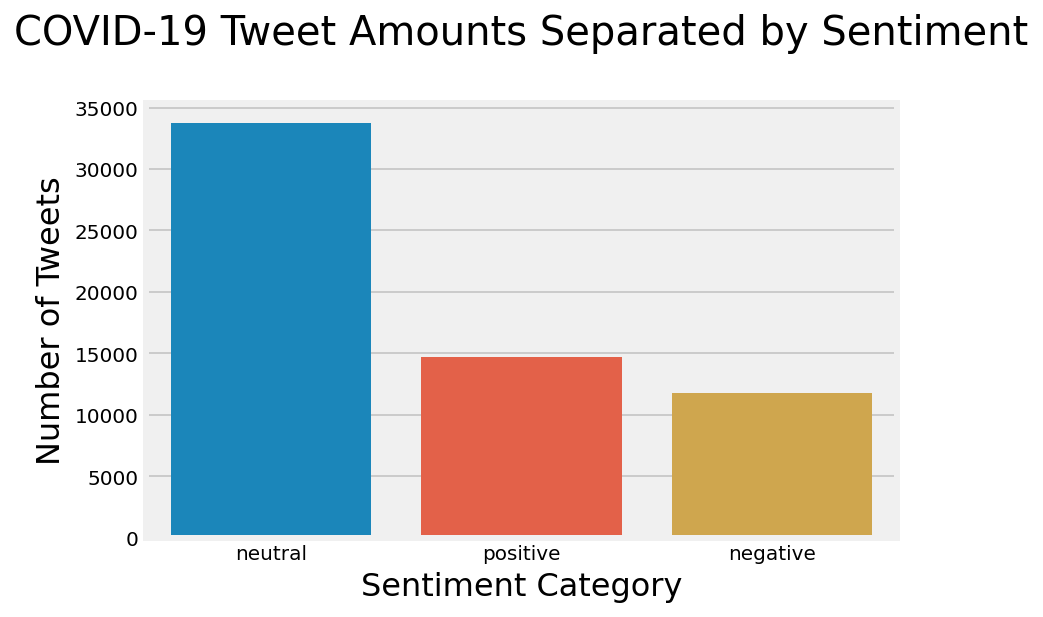

In [136]:

Sentiment_plt = sns.barplot(y="count", x='sentiment',data=COVID_Sentiment_plt)
Sentiment_plt.set_title('COVID-19 Tweet Amounts Separated by Sentiment\n',fontsize=20)
Sentiment_plt.set_xlabel('Sentiment Category',fontsize=16);
Sentiment_plt.set_ylabel('Number of Tweets',fontsize=16);

In [137]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [138]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [139]:
## Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Bag-Of-Words feature matrix - For columns "combine_df['tweet_lemmatized']"
bow_lemm = bow_vectorizer.fit_transform(COVID_Text['Text Processed']).toarray()
bow_lemm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [140]:
x=bow_lemm
y=COVID_Text['Sentiment']
y.replace(['neutral','positive','negative'],[0,1,-1],inplace=True)
y.head()

0    0
1    1
2    1
3   -1
4    0
Name: Sentiment, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [142]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [143]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("test Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9947251773049646
test Accuracy : 0.9346409574468085


In [144]:
y_pred=pd.Series(y_pred)
y_pred.replace([0,1,-1],['neutral','positive','negative'],inplace=True)
y_pred.head()

0    negative
1     neutral
2    negative
3     neutral
4     neutral
dtype: object